In [85]:
import pandas as pd
import numpy as np

In [86]:
df=pd.read_csv('data/top_crypto.csv', sep=",")
df['Date'] = pd.to_datetime(df['Date'])

#df.drop(index=1, inplace=True)
df.head(3)
df

,Date,Open,High,Low,Close,Adj Close,Volume($),Symbol,Daily Return
0,2020-09-01,11679.316406,12067.081055,11601.128906,11970.478516,11970.478516,27311555343,BTC,NaN
1,2020-09-02,11964.823242,11964.823242,11290.793945,11414.034180,11414.034180,28037405299,BTC,-0.046485
2,2020-09-03,11407.191406,11443.022461,10182.464844,10245.296875,10245.296875,31927261555,BTC,-0.102395
3,2020-09-04,10230.365234,10663.919922,10207.940430,10511.813477,10511.813477,29965130374,BTC,0.026014
4,2020-09-05,10512.530273,10581.571289,9946.675781,10169.567383,10169.567383,44916565292,BTC,-0.032558
...,...,...,...,...,...,...,...,...,...
21926,2024-12-12,1.818446,1.886472,1.776295,1.858669,1.858669,2431020,TON,0.022119
21927,2024-12-13,1.858669,2.158802,1.855042,1.945395,1.945395,50374183,TON,0.046660
21928,2024-12-14,1.945395,1.946723,1.811898,1.840731,1.840731,4601073,TON,-0.053801
21929,2024-12-15,1.840731,1.890505,1.819510,1.872803,1.872803,2688282,TON,0.017423


In [87]:
# Moving Averages
df['SMA_30'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=30).mean())
df['SMA_60'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=60).mean())
df['SMA_90'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=90).mean())

df['EMA_30'] = df.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span=30, adjust=False).mean())
df['EMA_60'] = df.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span=60, adjust=False).mean())
df['EMA_90'] = df.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span=90, adjust=False).mean())

# RSI Calculation
def calculate_rsi(x, periods=14):
    delta = x.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = df.groupby('Symbol')['Close'].transform(calculate_rsi)

# MACD Calculation
df['EMA_12'] = df.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
df['EMA_26'] = df.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df.groupby('Symbol')['MACD'].transform(lambda x: x.ewm(span=9, adjust=False).mean())
df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']


In [88]:
import numpy as np
import pandas as pd

df['Midpoint'] = (df['High'] + df['Low']) / 2

# Initialize columns for log returns and annualized volatility
df['Log_Return'] = np.nan
df['Annualized_Volatility'] = np.nan

#  daily log returns and annualized volatility for each symbol
for symbol, group in df.groupby('Symbol'):
    # Calculate log returns for the current group
    df.loc[group.index, 'Log_Return'] = np.log(group['Midpoint'] / group['Midpoint'].shift(1))
    
    # Calculate daily volatility for the current group
    daily_volatility = group['Log_Return'].std()
    
    # Annualize the daily volatility
    annualized_volatility = daily_volatility * np.sqrt(252)
    
    # Assign the annualized volatility to the entire group
    df.loc[group.index, 'Annualized_Volatility'] = annualized_volatility

    # Optionally, print the volatilities for each symbol
    print(f"Symbol: {symbol}")
    print(f"Daily Volatility: {daily_volatility}")
    print(f"Annualized Volatility: {annualized_volatility}\n")


Symbol: ADA
Daily Volatility: nan
Annualized Volatility: nan

Symbol: AVAX
Daily Volatility: nan
Annualized Volatility: nan

Symbol: BNB
Daily Volatility: nan
Annualized Volatility: nan

Symbol: BTC
Daily Volatility: nan
Annualized Volatility: nan

Symbol: DOGE
Daily Volatility: nan
Annualized Volatility: nan

Symbol: DOT
Daily Volatility: nan
Annualized Volatility: nan

Symbol: ETH
Daily Volatility: nan
Annualized Volatility: nan

Symbol: LINK
Daily Volatility: nan
Annualized Volatility: nan

Symbol: MATIC
Daily Volatility: nan
Annualized Volatility: nan

Symbol: SOL
Daily Volatility: nan
Annualized Volatility: nan

Symbol: TON
Daily Volatility: nan
Annualized Volatility: nan

Symbol: TRX
Daily Volatility: nan
Annualized Volatility: nan

Symbol: USDT
Daily Volatility: nan
Annualized Volatility: nan

Symbol: XRP
Daily Volatility: nan
Annualized Volatility: nan



#### 30, 60, 90 Moving Average

In [89]:
#  Moving Averages for the Closing Prices of each stock
df['30_day_MA'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=30).mean())
df['60_day_MA'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=60).mean())
df['90_day_MA'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=90).mean())

#### 30-Day Rolling Volatility 

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

btc_log_returns = df[df['Symbol'] == 'BTC']['Log_Return']
eth_log_returns = df[df['Symbol'] == 'ETH']['Log_Return']

df.loc[df['Symbol'] == 'BTC', 'BTC_Volatility'] = btc_log_returns.rolling(window=30).std() * np.sqrt(252)
df.loc[df['Symbol'] == 'ETH', 'ETH_Volatility'] = eth_log_returns.rolling(window=30).std() * np.sqrt(252)


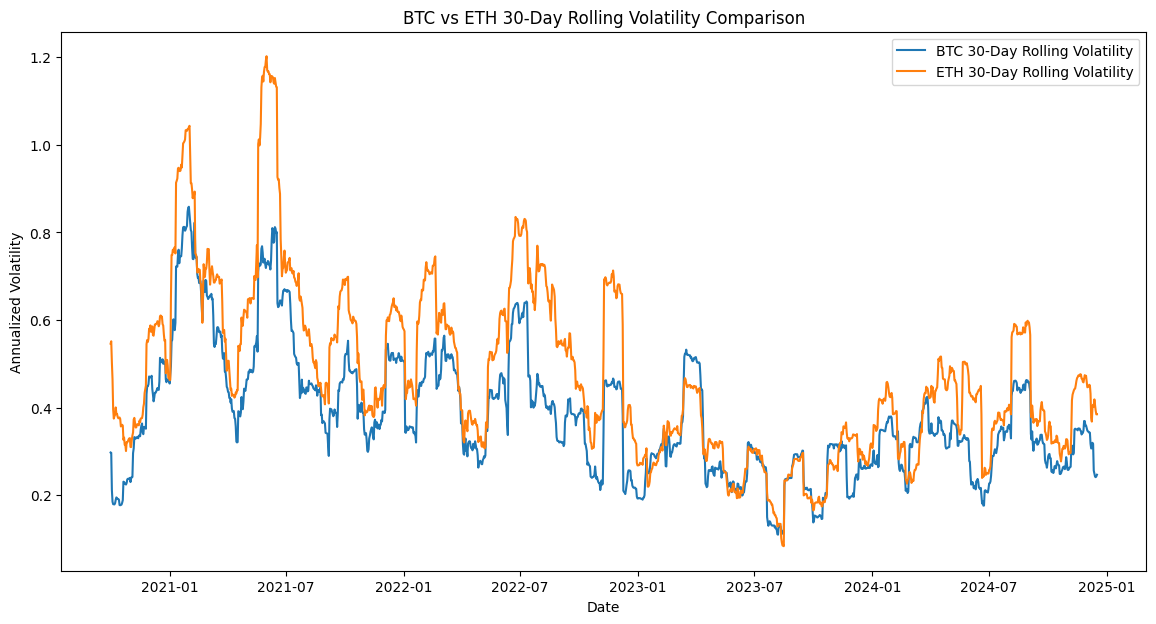

In [91]:
# Pivot the DataFrame to get a date index and separate columns for BTC and ETH volatility
volatility_df = df.pivot_table(index='Date', values=['BTC_Volatility', 'ETH_Volatility'], aggfunc='first')


plt.figure(figsize=(14, 7))
plt.plot(volatility_df['BTC_Volatility'], label='BTC 30-Day Rolling Volatility')
plt.plot(volatility_df['ETH_Volatility'], label='ETH 30-Day Rolling Volatility')
plt.title('BTC vs ETH 30-Day Rolling Volatility Comparison')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.show()


In [92]:
df.isnull().sum()


Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Adj Close                    0
Volume($)                    0
Symbol                       0
Daily Return                14
SMA_30                     406
SMA_60                     826
SMA_90                    1246
EMA_30                       0
EMA_60                       0
EMA_90                       0
RSI                        182
EMA_12                       0
EMA_26                       0
MACD                         0
Signal_Line                  0
MACD_Histogram               0
Midpoint                     0
Log_Return                  14
Annualized_Volatility    21931
30_day_MA                  406
60_day_MA                  826
90_day_MA                 1246
BTC_Volatility           20393
ETH_Volatility           20393
dtype: int64

#### Creating Lag Features

Created by shifting the values of a given feature backwards in time. This process introduces previous time steps of a feature as input for predictions, allowing models to learn from past values to predict future ones. For cryptocurrencies, lag features of prices and volumes can be particularly informative.

In [93]:
# Creating lag features for 'Close' and 'Volume($)'
for lag in [1, 3, 7]:
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
    df[f'Volume_lag_{lag}'] = df['Volume($)'].shift(lag)

# Generating rolling window features for 'Close' and 'Volume($)'
for window in [7, 30]:
    df[f'Close_rolling_mean_{window}'] = df['Close'].rolling(window=window).mean()
    df[f'Close_rolling_std_{window}'] = df['Close'].rolling(window=window).std()
    df[f'Volume_rolling_mean_{window}'] = df['Volume($)'].rolling(window=window).mean()
    df[f'Volume_rolling_std_{window}'] = df['Volume($)'].rolling(window=window).std()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume($),Symbol,Daily Return,SMA_30,...,Close_lag_7,Volume_lag_7,Close_rolling_mean_7,Close_rolling_std_7,Volume_rolling_mean_7,Volume_rolling_std_7,Close_rolling_mean_30,Close_rolling_std_30,Volume_rolling_mean_30,Volume_rolling_std_30
0,2020-09-01,11679.316406,12067.081055,11601.128906,11970.478516,11970.478516,27311555343,BTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-02,11964.823242,11964.823242,11290.793945,11414.034180,11414.034180,28037405299,BTC,-0.046485,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-03,11407.191406,11443.022461,10182.464844,10245.296875,10245.296875,31927261555,BTC,-0.102395,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-09-04,10230.365234,10663.919922,10207.940430,10511.813477,10511.813477,29965130374,BTC,0.026014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-05,10512.530273,10581.571289,9946.675781,10169.567383,10169.567383,44916565292,BTC,-0.032558,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df.drop(columns=['BTC_Volatility', 'ETH_Volatility','Annualized_Volatility'], inplace=True)

In [95]:
# Drop the initial rows where rolling features cannot be computed (first 30 days due to the longest window)
df = df.dropna()


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20685 entries, 89 to 21930
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    20685 non-null  datetime64[ns]
 1   Open                    20685 non-null  float64       
 2   High                    20685 non-null  float64       
 3   Low                     20685 non-null  float64       
 4   Close                   20685 non-null  float64       
 5   Adj Close               20685 non-null  float64       
 6   Volume($)               20685 non-null  int64         
 7   Symbol                  20685 non-null  object        
 8   Daily Return            20685 non-null  float64       
 9   SMA_30                  20685 non-null  float64       
 10  SMA_60                  20685 non-null  float64       
 11  SMA_90                  20685 non-null  float64       
 12  EMA_30                  20685 non-null  float64   

In [97]:
# Convert the Date column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day as separate features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
#df = df.drop('Date', axis=1)


C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_36404\1894119267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_36404\1894119267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_36404\1894119267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [98]:
date_range = df['Date'].agg(['min', 'max'])


In [99]:
date_range

min   2020-11-29
max   2024-12-16
Name: Date, dtype: datetime64[ns]

In [100]:
df.to_csv('data/df_ml.csv', index=False)